In [3]:
import cv2
import mediapipe as mp
import time
import numpy as np

# Initialize MediaPipe Hands.
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Initialize video capture
cap = cv2.VideoCapture(0)  # Change to the appropriate camera index if needed

# Variable to store start time of computation
start_time = time.time()

# Variable to store number of frames processed
num_frames = 0
fps_values= []
latency_values=[]

while cap.isOpened():
    # Read frame from video capture
    ret, frame = cap.read()
    if not ret:
        break

    # Measure start time of processing for the current frame
    frame_start_time = time.time()

    # Convert the BGR image to RGB.
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process frame with MediaPipe Hands.
    results = hands.process(rgb_frame)

    # Draw hand landmarks if detected
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Display the frame
    cv2.imshow('MediaPipe Hands', frame)

    # Increment the number of frames processed
    num_frames += 1

    # Calculate FPS every 10 frames
    if num_frames % 10 == 0:
        # Calculate elapsed time since the start
        elapsed_time = time.time() - start_time

        # Calculate FPS
        fps = num_frames / elapsed_time

        # Append FPS value to the array
        fps_values.append(fps)

    # Calculate frame latency (time taken to process the frame)
    frame_latency = time.time() - frame_start_time
    latency_values.append(frame_latency)

    # Break loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture
cap.release()
cv2.destroyAllWindows()

# # Calculate total time taken
# total_time = time.time() - start_time

# # Calculate average frame latency
# average_latency = total_time / num_frames

# Convert the list of FPS values to a numpy array
fps_values = np.array(fps_values)
latency_values = np.array(latency_values)

# Print the array of FPS values
print("FPS values:", fps_values)
print("Latency values:", latency_values)



C:\Users\ishan\AppData\Roaming\Python\Python312\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


FPS values: [10.11389972 15.42814789 18.62566141 20.74829172 22.05409835 23.02792524
 23.85169187 24.43900019 25.0554015  25.42366676 25.70519756 25.98297961
 26.34704216 26.53941303 26.83496528 26.99468018 27.06360519 27.22827802
 27.38908826 27.50867544 27.66862245 27.73669543 27.72151879 27.90479393
 27.93383807 27.67020041 27.51720594 27.66619924 27.67682683 27.76167191
 27.81444621 27.70264164 27.53619526 27.66574498 27.59722811 27.66074886
 27.34914562 27.155447   26.97331719 26.79773134 26.63563444 26.71776994
 26.80912418 26.89898137 26.84694154 26.69902355 26.6095461  26.71090884
 26.80623237 26.92590803 27.00309965 27.00572487]
Latency values: [0.04640317 0.02455449 0.02078199 0.02023363 0.01992846 0.02088022
 0.02077699 0.02279663 0.02100945 0.02115226 0.02301025 0.01943541
 0.01983762 0.02055812 0.01864004 0.01993775 0.01964545 0.02116632
 0.01957917 0.01956892 0.01969266 0.01958537 0.01977944 0.01952147
 0.02102351 0.01946211 0.01916623 0.02096248 0.01952338 0.01906872
 0.

In [7]:
final_fps1=fps_values
final_fps1

array([10.11389972, 15.42814789, 18.62566141, 20.74829172, 22.05409835,
       23.02792524, 23.85169187, 24.43900019, 25.0554015 , 25.42366676,
       25.70519756, 25.98297961, 26.34704216, 26.53941303, 26.83496528,
       26.99468018, 27.06360519, 27.22827802, 27.38908826, 27.50867544,
       27.66862245, 27.73669543, 27.72151879, 27.90479393, 27.93383807,
       27.67020041, 27.51720594, 27.66619924, 27.67682683, 27.76167191,
       27.81444621, 27.70264164, 27.53619526, 27.66574498, 27.59722811,
       27.66074886, 27.34914562, 27.155447  , 26.97331719, 26.79773134,
       26.63563444, 26.71776994, 26.80912418, 26.89898137, 26.84694154,
       26.69902355, 26.6095461 , 26.71090884, 26.80623237, 26.92590803,
       27.00309965, 27.00572487])

In [8]:
final_latency1=latency_values
final_latency1

array([0.04640317, 0.02455449, 0.02078199, 0.02023363, 0.01992846,
       0.02088022, 0.02077699, 0.02279663, 0.02100945, 0.02115226,
       0.02301025, 0.01943541, 0.01983762, 0.02055812, 0.01864004,
       0.01993775, 0.01964545, 0.02116632, 0.01957917, 0.01956892,
       0.01969266, 0.01958537, 0.01977944, 0.01952147, 0.02102351,
       0.01946211, 0.01916623, 0.02096248, 0.01952338, 0.01906872,
       0.01804519, 0.01909757, 0.01933885, 0.01900363, 0.01992869,
       0.01945591, 0.01932693, 0.01900554, 0.0194943 , 0.01832032,
       0.02002311, 0.01957059, 0.02003193, 0.01900458, 0.01907015,
       0.01882339, 0.0194602 , 0.01804638, 0.01899409, 0.01887918,
       0.01878738, 0.01849174, 0.01935697, 0.01864171, 0.01898623,
       0.0190649 , 0.01973391, 0.01928306, 0.01897359, 0.01925635,
       0.01875234, 0.01903462, 0.01957226, 0.01896548, 0.02003956,
       0.01859403, 0.01895881, 0.01890349, 0.01889467, 0.01840019,
       0.01908565, 0.01874375, 0.01921082, 0.01882267, 0.01942

In [98]:
import cv2
import time
import numpy as np


protoFile = "hand/pose_deploy.prototxt"
weightsFile = "hand/pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]

threshold = 0.08


cap = cv2.VideoCapture(0)
hasFrame, frame = cap.read()

frame = cv2.resize(frame, (320, 240))

frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
print(frameWidth,frameHeight)
aspect_ratio = frameWidth/frameHeight

# Variable to store start time of computation
start_time = time.time()

# Variable to store number of frames processed
num_frames = 0
fps_values2= []
latency_values2=[]

inHeight = 180
inWidth = int(((aspect_ratio*inHeight)*8)//8)

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
k = 0
while 1:
    k+=1
    t = time.time()
    hasFrame, frame = cap.read()
    frame = cv2.resize(frame, (480, 360))
    frameCopy = np.copy(frame)
    if not hasFrame:
        cv2.waitKey()
        break

     # Measure start time of processing for the current frame
    frame_start_time = time.time()

    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                              (0, 0, 0), swapRB=False, crop=False)

    net.setInput(inpBlob)

    output = net.forward()

    # print("forward = {}".format(time.time() - t))

    # Empty list to store the detected keypoints
    points = []

    for i in range(nPoints):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        probMap = cv2.resize(probMap, (frameWidth, frameHeight))

        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

        if prob > threshold :
            cv2.circle(frameCopy, (int(point[0]), int(point[1])), 6, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

            # Add the point to the list if the probability is greater than the threshold
            points.append((int(point[0]), int(point[1])))
        else :
            points.append(None)

    # Draw Skeleton
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2, lineType=cv2.LINE_AA)
            cv2.circle(frame, points[partA], 5, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.circle(frame, points[partB], 5, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

    # print("Time Taken for frame = {}".format(time.time() - t))

    # Calculate frame latency (time taken to process the frame)
    frame_latency2 = time.time() - frame_start_time
    latency_values2.append(frame_latency2)
    
    cv2.imshow('Output-Skeleton', frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

    # print("total = {}".format(time.time() - t))

    # Increment the number of frames processed
    num_frames += 1
    # print(num_frames)

    # Calculate FPS every 10 frames
    if num_frames % 5 == 0:
        # Calculate elapsed time since the start
        elapsed_time = time.time() - start_time

        # Calculate FPS
        fps = num_frames / elapsed_time

        # Append FPS value to the array
        fps_values2.append(fps)

# Release video capture
cap.release()
cv2.destroyAllWindows()

# Convert the list of FPS values to a numpy array
fps_values2 = np.array(fps_values2)
latency_values2 = np.array(latency_values2)

# Print the array of FPS values
print("FPS values:", fps_values2)
print("Latency values:", latency_values2)




160 120
FPS values: [ 5.37902031  7.15025041  8.03439406  8.57517903  8.91824472  9.1722609
  9.35759856  9.47073033  9.56297489  9.65997243  9.74521286  9.81930227
  9.88524792  9.93746095  9.98314271 10.02977778 10.06462671 10.098702
 10.12825447 10.15600518 10.17603634 10.20167489 10.22178312 10.24249165
 10.25815634 10.27388058 10.290089   10.30311575 10.31332721 10.32625058
 10.3377399  10.34790632 10.35714885 10.36687512 10.37521109 10.38254424
 10.38957166 10.39888471 10.40438504 10.41095327 10.41769737 10.42489697
 10.42521797 10.42395177 10.42890877 10.42714528 10.42536288 10.41688346
 10.40976331 10.41501745 10.41209149 10.41791424 10.42162356 10.42568796
 10.43008336 10.43393771 10.4394898  10.44382435 10.44780719 10.45180609
 10.44405449 10.44817589 10.45157166 10.45491237 10.45868841 10.4624533
 10.46538982 10.46929326 10.4711385  10.47341827 10.47670127 10.47981685
 10.48236422 10.48469049 10.48673925 10.48916587 10.49155781 10.49334871
 10.49555833 10.49870812 10.5000730

In [99]:
final_fps2=fps_values2
final_fps2

array([ 5.37902031,  7.15025041,  8.03439406,  8.57517903,  8.91824472,
        9.1722609 ,  9.35759856,  9.47073033,  9.56297489,  9.65997243,
        9.74521286,  9.81930227,  9.88524792,  9.93746095,  9.98314271,
       10.02977778, 10.06462671, 10.098702  , 10.12825447, 10.15600518,
       10.17603634, 10.20167489, 10.22178312, 10.24249165, 10.25815634,
       10.27388058, 10.290089  , 10.30311575, 10.31332721, 10.32625058,
       10.3377399 , 10.34790632, 10.35714885, 10.36687512, 10.37521109,
       10.38254424, 10.38957166, 10.39888471, 10.40438504, 10.41095327,
       10.41769737, 10.42489697, 10.42521797, 10.42395177, 10.42890877,
       10.42714528, 10.42536288, 10.41688346, 10.40976331, 10.41501745,
       10.41209149, 10.41791424, 10.42162356, 10.42568796, 10.43008336,
       10.43393771, 10.4394898 , 10.44382435, 10.44780719, 10.45180609,
       10.44405449, 10.44817589, 10.45157166, 10.45491237, 10.45868841,
       10.4624533 , 10.46538982, 10.46929326, 10.4711385 , 10.47

In [100]:
final_latency2=latency_values2
final_latency2

array([0.21286631, 0.08954811, 0.08960581, 0.09059548, 0.08813667,
       0.08574152, 0.08423209, 0.08476806, 0.08817744, 0.08570313,
       0.08538437, 0.08141112, 0.08250904, 0.08014297, 0.08074212,
       0.08136868, 0.08511472, 0.08327866, 0.08628726, 0.07768965,
       0.08231688, 0.08123302, 0.08325839, 0.08169675, 0.08481669,
       0.08705354, 0.08692765, 0.08577275, 0.08735132, 0.08767819,
       0.08686972, 0.08708143, 0.08809686, 0.08507013, 0.08488965,
       0.08168793, 0.08210945, 0.08629489, 0.0872395 , 0.09034157,
       0.0887711 , 0.08390808, 0.08586311, 0.08568954, 0.08542109,
       0.08085275, 0.08376789, 0.08347249, 0.08245802, 0.083915  ,
       0.08017993, 0.0838356 , 0.08507681, 0.08490634, 0.08232975,
       0.08274841, 0.0843513 , 0.07913542, 0.08332992, 0.08272052,
       0.08194017, 0.08440399, 0.08367181, 0.08166027, 0.0833497 ,
       0.08131504, 0.08129811, 0.08210826, 0.08346915, 0.08651519,
       0.08499789, 0.08087397, 0.08407855, 0.08352137, 0.08199

Visualization

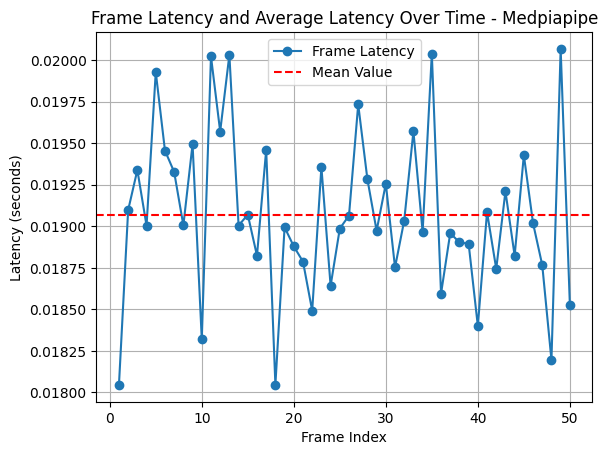

In [43]:
import matplotlib.pyplot as plt

l_val_1 = final_latency1[30:80]

# Generate indices for the data points
frame_indices = range(1, len(l_val_1) + 1)

# Plot frame latencies
plt.plot(frame_indices, l_val_1, label='Frame Latency', marker='o')

average = np.mean(l_val_1)
plt.axhline(y=average, color='r', linestyle='--', label='Mean Value')


# Add labels and title
plt.xlabel('Frame Index')
plt.ylabel('Latency (seconds)')
plt.title('Frame Latency and Average Latency Over Time - Medpiapipe')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


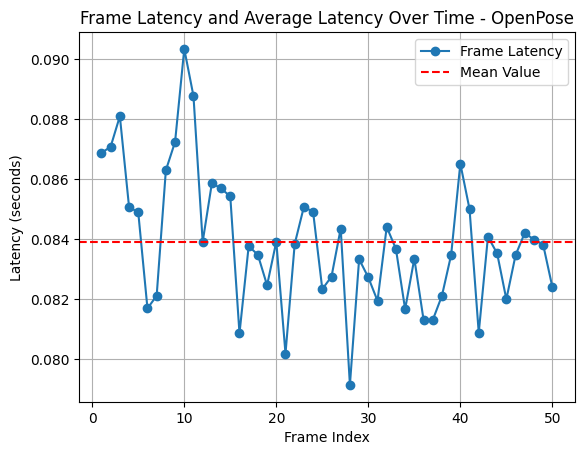

In [101]:
import matplotlib.pyplot as plt

l_val_2 = final_latency2[30:80]

# Generate indices for the data points
frame_indices = range(1, len(l_val_2) + 1)

# Plot frame latencies
plt.plot(frame_indices, l_val_2, label='Frame Latency', marker='o')

average = np.mean(l_val_2)
plt.axhline(y=average, color='r', linestyle='--', label='Mean Value')


# Add labels and title
plt.xlabel('Frame Index')
plt.ylabel('Latency (seconds)')
plt.title('Frame Latency and Average Latency Over Time - OpenPose')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


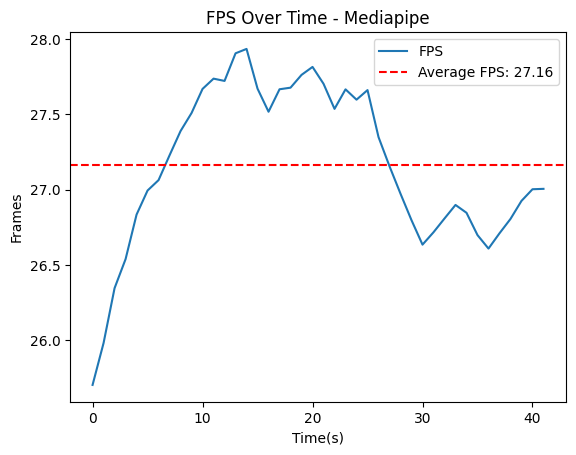

In [96]:
import matplotlib.pyplot as plt

# Assuming fps_values contains the FPS values over time
# fps_values = [23.13, 23.80, 26.11, 14.57, 25.58, 25.00, 24.00, 24.93, 24.04, 24.39, 23.25, 24.07, 24.38, 24.00, 25.53, 23.77, 24.35, 25.00, 24.14, 24.38, 24.04, 25.00, 27.07, 24.26, 16.16, 25.28, 22.74, 23.97, 24.40, 24.23, 24.76, 27.75, 24.15, 24.06, 24.17, 26.45, 24.39, 23.91, 24.10, 24.05, 24.79, 26.82, 28.35, 23.96, 24.67, 24.09, 22.32, 26.23, 23.94, 23.99, 23.86, 24.10, 24.05, 23.98, 23.95, 23.86, 24.26, 24.04, 14.25, 24.70, 25.01, 23.89, 24.03, 23.51, 24.79, 23.37, 22.89, 26.22, 23.73, 24.82, 23.52, 24.30, 24.59, 23.65, 23.75, 24.38, 23.80, 24.04, 22.22, 24.03, 22.67, 25.62, 24.33, 23.82, 24.06, 24.40, 24.04, 24.96, 23.24, 23.50, 24.29, 25.22, 23.83, 14.20, 23.71, 23.45, 24.39, 24.34, 24.67, 23.79, 25.27, 22.73, 23.44, 24.38, 24.36, 24.23, 23.81, 24.82, 24.38, 24.04, 24.34, 23.35, 24.61, 24.94, 24.64, 24.35, 26.19, 27.77, 24.10, 23.78, 24.08, 23.10, 24.95, 21.23, 25.22, 27.69, 24.15, 24.00, 24.57, 20.75, 23.21, 24.01, 23.76, 24.22, 23.78]

f_val_1 = final_fps1[10:600]

# Calculate average FPS
average_fps = sum(f_val_1) / len(f_val_1)

# Plot the graph
plt.plot(f_val_1, label='FPS')
plt.axhline(y=average_fps, color='r', linestyle='--', label=f'Average FPS: {average_fps:.2f}')
plt.title('FPS Over Time - Mediapipe')
plt.xlabel('Time(s)')
plt.ylabel('Frames')
plt.legend(loc='upper right')
plt.show()


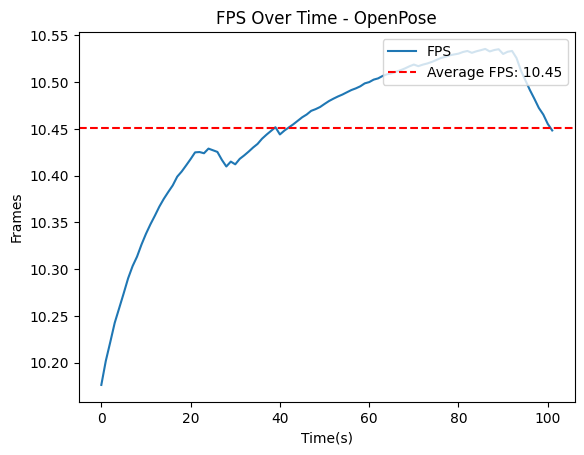

In [104]:
import matplotlib.pyplot as plt

# Assuming fps_values contains the FPS values over time
# fps_values = [23.13, 23.80, 26.11, 14.57, 25.58, 25.00, 24.00, 24.93, 24.04, 24.39, 23.25, 24.07, 24.38, 24.00, 25.53, 23.77, 24.35, 25.00, 24.14, 24.38, 24.04, 25.00, 27.07, 24.26, 16.16, 25.28, 22.74, 23.97, 24.40, 24.23, 24.76, 27.75, 24.15, 24.06, 24.17, 26.45, 24.39, 23.91, 24.10, 24.05, 24.79, 26.82, 28.35, 23.96, 24.67, 24.09, 22.32, 26.23, 23.94, 23.99, 23.86, 24.10, 24.05, 23.98, 23.95, 23.86, 24.26, 24.04, 14.25, 24.70, 25.01, 23.89, 24.03, 23.51, 24.79, 23.37, 22.89, 26.22, 23.73, 24.82, 23.52, 24.30, 24.59, 23.65, 23.75, 24.38, 23.80, 24.04, 22.22, 24.03, 22.67, 25.62, 24.33, 23.82, 24.06, 24.40, 24.04, 24.96, 23.24, 23.50, 24.29, 25.22, 23.83, 14.20, 23.71, 23.45, 24.39, 24.34, 24.67, 23.79, 25.27, 22.73, 23.44, 24.38, 24.36, 24.23, 23.81, 24.82, 24.38, 24.04, 24.34, 23.35, 24.61, 24.94, 24.64, 24.35, 26.19, 27.77, 24.10, 23.78, 24.08, 23.10, 24.95, 21.23, 25.22, 27.69, 24.15, 24.00, 24.57, 20.75, 23.21, 24.01, 23.76, 24.22, 23.78]

f_val_2 = final_fps2[20:200]

# Calculate average FPS
average_fps = sum(f_val_2) / len(f_val_2)

# Plot the graph
plt.plot(f_val_2, label='FPS')
plt.axhline(y=average_fps, color='r', linestyle='--', label=f'Average FPS: {average_fps:.2f}')
plt.title('FPS Over Time - OpenPose')
plt.xlabel('Time(s)')
plt.ylabel('Frames')
plt.legend(loc='upper right')
plt.show()
